# Exercise 10  
## 10a

In [1]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

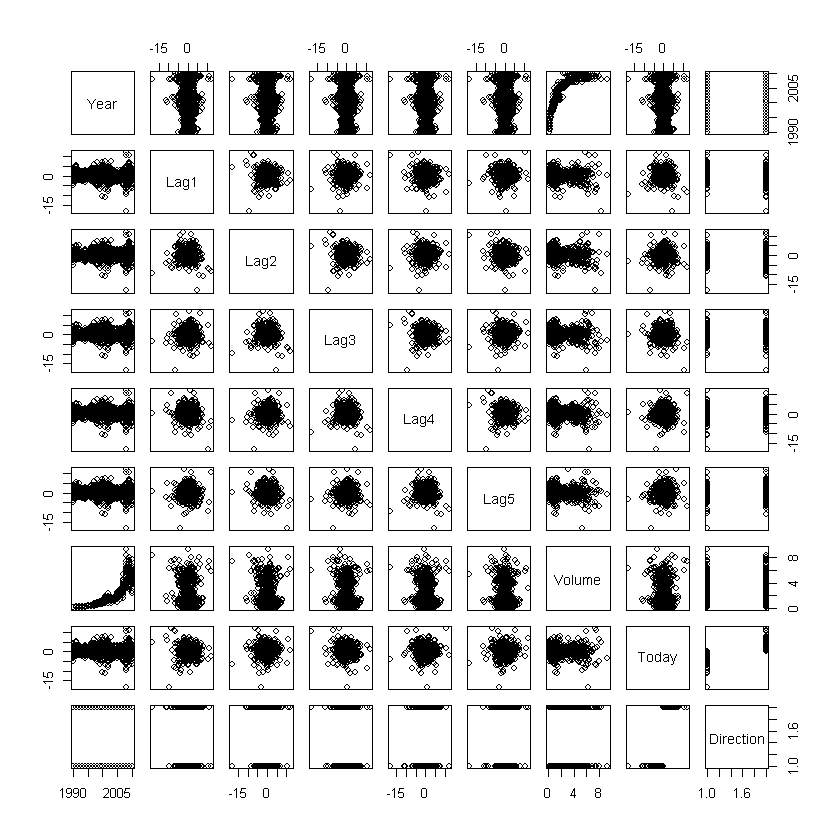

In [2]:
pairs(Weekly)

In [3]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


## 10b

In [4]:
attach(Weekly)
glm.fit=glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,data=Weekly,family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


## 10c

In [5]:
glm.prob=predict(glm.fit,type = "response")
glm.pred=rep("Down",length(glm.prob))
glm.pred[glm.prob>0.5]="Up"
table(glm.pred,Direction)
mean(glm.pred==Direction)

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

[1] 0.5610652

## 10d


In [6]:
train=(Year<2009)
Weekly.0910=Weekly[!train,]
glm.fit=glm(Direction~Lag2,data=Weekly,family = binomial,subset = train)
glm.probs=predict(glm.fit,Weekly.0910,type = "response")
glm.pred=rep("Down",length(glm.probs))
glm.pred[glm.probs>0.5]="Up"
Direction.0910=Direction[!train]
table(glm.pred,Direction.0910)
mean(glm.pred==Direction.0910)

        Direction.0910
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

## 10e

In [7]:
library(MASS)
lda.fit=lda(Direction~Lag2,data=Weekly,subset=train)
lda.pred=predict(lda.fit,Weekly.0910)
table(lda.pred$class,Direction.0910)
mean(lda.pred$class==Direction.0910)

      Direction.0910
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

## 10f

In [8]:
qda.fit=qda(Direction~Lag2,data = Weekly,subset = train)
qda.pred=predict(qda.fit,Weekly.0910)
table(qda.pred$class,Direction.0910)
mean(qda.pred$class==Direction.0910)


      Direction.0910
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

## 10f

In [9]:
library(class)
train.X=as.matrix(Lag2[train])
test.X=as.matrix(Lag2[!train])
train.Direction=Direction[train]
set.seed(1)
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.0910)
mean(knn.pred==Direction.0910)

        Direction.0910
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

## 10i

In [10]:
glm.fit = glm(Direction ~ Lag2:Lag1, data = Weekly, family = binomial, subset = train)
glm.probs = predict(glm.fit, Weekly.0910, type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
Direction.0910 = Direction[!train]
table(glm.pred, Direction.0910)
mean(glm.pred==Direction.0910)

        Direction.0910
glm.pred Down Up
    Down    1  1
    Up     42 60

[1] 0.5865385

In [11]:
lda.fit=lda(Direction~Lag2:Lag1,data=Weekly,subset = train)
lda.pred=predict(lda.fit,Weekly.0910)
table(lda.pred$class,Direction.0910)
mean(lda.pred$class==Direction.0910)

      Direction.0910
       Down Up
  Down    0  1
  Up     43 60

[1] 0.5769231

In [12]:
qda.fit = qda(Direction ~ Lag2 + sqrt(abs(Lag2)), data = Weekly, subset = train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class==Direction.0910)

         Direction.0910
qda.class Down Up
     Down   12 13
     Up     31 48

[1] 0.5769231

In [13]:
knn.pred = knn(train.X, test.X, train.Direction, k = 10)
table(knn.pred, Direction.0910)
mean(knn.pred==Direction.0910)

        Direction.0910
knn.pred Down Up
    Down   17 18
    Up     26 43

[1] 0.5769231

In [14]:
knn.pred = knn(train.X, test.X, train.Direction, k = 100)
table(knn.pred, Direction.0910)
mean(knn.pred==Direction.0910)

        Direction.0910
knn.pred Down Up
    Down    9 12
    Up     34 49

[1] 0.5576923

In [15]:
knn.pred = knn(train.X, test.X, train.Direction, k = 200)
table(knn.pred, Direction.0910)
mean(knn.pred==Direction.0910)

        Direction.0910
knn.pred Down Up
    Down    3  0
    Up     40 61

[1] 0.6153846

# Exercise11  
## 11a

In [16]:
library(ISLR)
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [17]:
attach(Auto)
mpg01=rep(0,length(mpg))
mpg01[mpg>median(mpg)]=1
Auto=data.frame(Auto,mpg01)

## 10b

In [18]:
cor(Auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


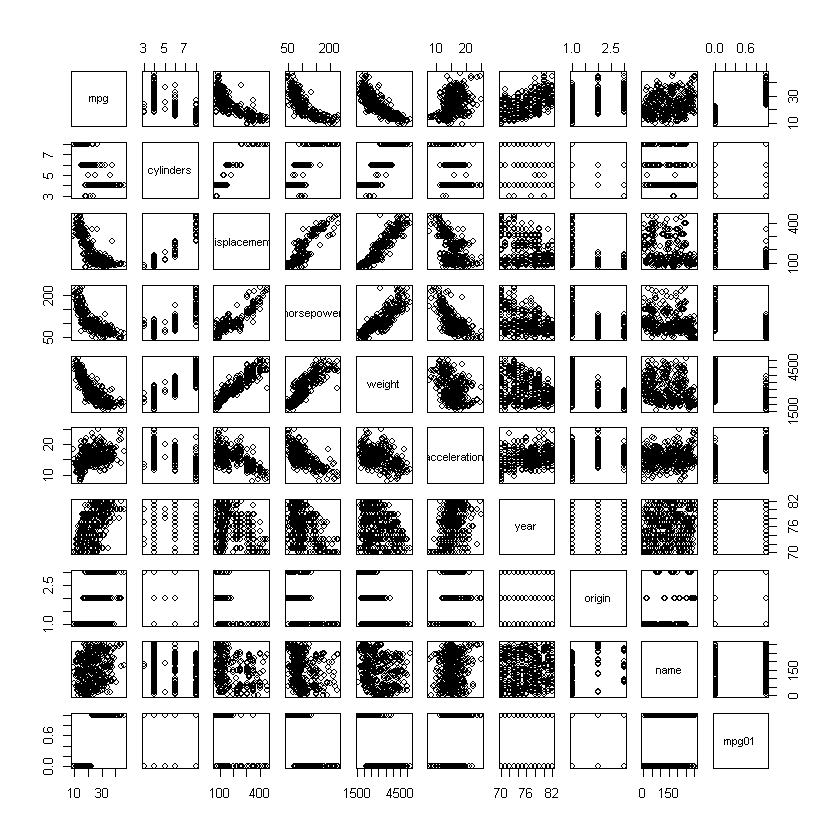

In [19]:
pairs(Auto)

In [20]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


## 11c

In [21]:
train=(year%%2==0)
test=!train
Auto.test=Auto[test,]
Auto.train=Auto[train,]
mpg01.test=mpg01[test]

## 11d

In [22]:
library(MASS)
lda.fit=lda(mpg01~cylinders + weight + displacement + horsepower,data = Auto,subset = train)
lda.pred=predict(lda.fit,Auto.test)
table(lda.pred$class,mpg01.test)
mean(lda.pred$class==mpg01.test)

   mpg01.test
     0  1
  0 86  9
  1 14 73

[1] 0.8736264

In [23]:
qda.fit=qda(mpg01~cylinders+weight+displacement+horsepower,data = Auto,subset = train)
qda.pred=predict(qda.fit,Auto.test)
table(qda.pred$class,mpg01.test)
mean(qda.pred$class==mpg01.test)

   mpg01.test
     0  1
  0 89 13
  1 11 69

[1] 0.8681319

## 11f

In [24]:
glm.fit = glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto,family = binomial, subset = train)
glm.probs=predict(glm.fit,Auto.test,type = "response")
glm.pred=rep(0,length(glm.probs))
glm.pred[glm.probs>0.5]=1
table(glm.pred,mpg01.test)
mean(glm.pred!=mpg01.test)

        mpg01.test
glm.pred  0  1
       0 89 11
       1 11 71

[1] 0.1208791

## 11g

In [25]:
library(MASS)
train.X=cbind(cylinders, weight, displacement, horsepower)[train,]
test.X=cbind(cylinders, weight, displacement, horsepower)[test,]
train.mpg01=mpg01[train]
set.seed(1)
knn.pred=knn(train.X,test.X,train.mpg01,k=1)
table(knn.pred,mpg01.test)
mean(knn.pred==mpg01.test)

        mpg01.test
knn.pred  0  1
       0 83 11
       1 17 71

[1] 0.8461538

In [26]:
knn.pred=knn(train.X,test.X,train.mpg01,k=10)
table(knn.pred,mpg01.test)
mean(knn.pred==mpg01.test)

        mpg01.test
knn.pred  0  1
       0 77  7
       1 23 75

[1] 0.8351648

In [27]:
knn.pred=knn(train.X,test.X,train.mpg01,k=100)
table(knn.pred,mpg01.test)
mean(knn.pred==mpg01.test)

        mpg01.test
knn.pred  0  1
       0 81  7
       1 19 75

[1] 0.8571429

# Exercise 12  

In [28]:
Power=function(){
    2^3
}
print(Power)

function(){
    2^3
}


In [29]:
Power2 = function(x, a) {
    x^a
}
Power2(3, 8)

[1] 6561

In [30]:
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

[1] 1000

[1] 2.2518e+15

[1] 2248091

In [31]:
Power3 = function(x, a) {
    result = x^a
    return(result)
}

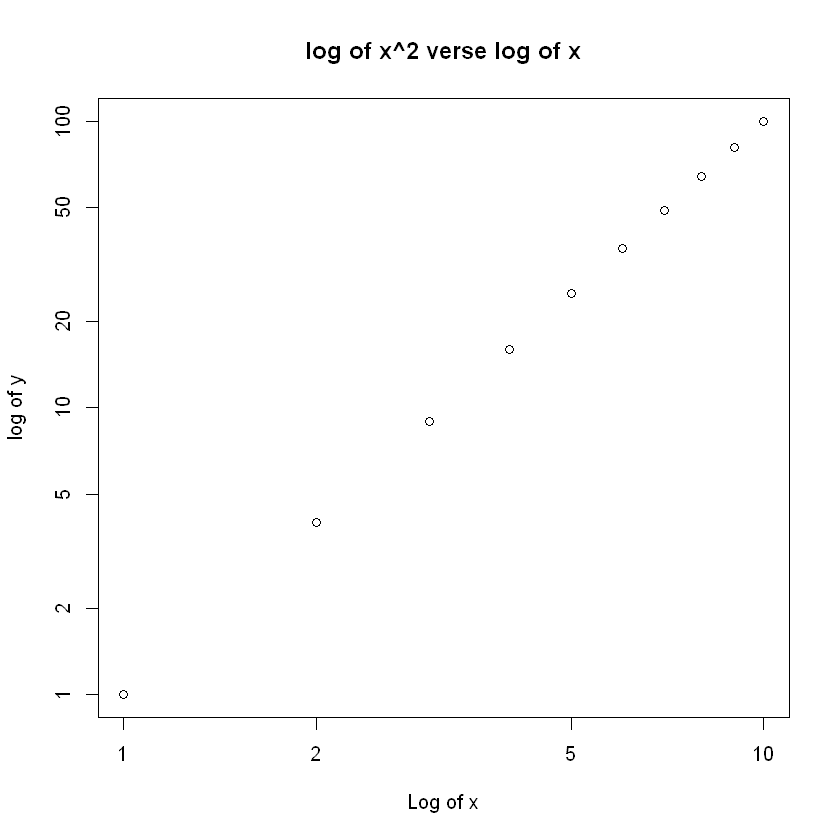

In [32]:
x=1:10
plot(x,Power3(x,2),log='xy',ylab="log of y",xlab = "Log of x",main = "log of x^2 verse log of x")

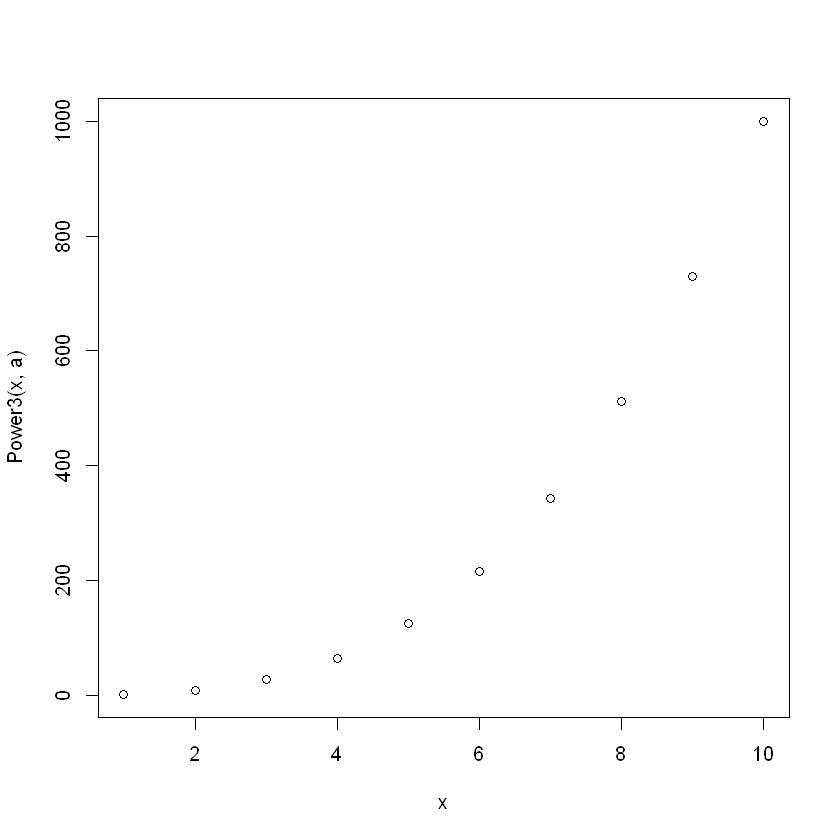

In [33]:
PlotPower = function(x, a) {
    plot(x, Power3(x, a))
}
PlotPower(1:10, 3)

# Exercise13

In [34]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [35]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [36]:
attach(Boston)
crime01=rep(0,length(crim))
crime01[crim>median(crim)]=1
train=1:(dim(Boston)[1]/2)
test=(dim(Boston)[1]/2 + 1):dim(Boston)[1]
Boston.train=Boston[train,]
Boston.test=Boston[test,]
crime01.test = crime01[test]


In [37]:
glm.fit=glm(crime01~.-crime01-crim,data = Boston,family = binomial,subset = train)
glm.probs=predict(glm.fit,Boston.test,type = "response")
glm.pred=rep(0,length(glm.probs))
glm.pred[glm.probs>0.5]=1
table(glm.pred,crime01.test)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


        crime01.test
glm.pred   0   1
       0  68  24
       1  22 139

In [38]:
glm.fit=glm(crime01~.-crime01-crim- chas - tax,data = Boston,family = binomial,subset = train)
glm.probs=predict(glm.fit,Boston.test,type = "response")
glm.pred=rep(0,length(glm.probs))
glm.pred[glm.probs>0.5]=1
table(glm.pred,crime01.test)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


        crime01.test
glm.pred   0   1
       0  67  24
       1  23 139

In [39]:
glm.fit=glm(crime01~.-crime01-crim- chas - tax- lstat - indus - age,data = Boston,family = binomial,subset = train)
glm.probs=predict(glm.fit,Boston.test,type = "response")
glm.pred=rep(0,length(glm.probs))
glm.pred[glm.probs>0.5]=1
table(glm.pred,crime01.test)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


        crime01.test
glm.pred   0   1
       0  64  22
       1  26 141

In [40]:
library(class)
train.X = cbind(zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, 
    lstat, medv)[train, ]
test.X = cbind(zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, 
    lstat, medv)[test, ]
train.crime01 = crime01[train]
set.seed(1)

In [41]:
knn.pred = knn(train.X, test.X, train.crime01, k = 1)
mean(knn.pred == crime01.test)

[1] 0.541502

In [42]:
knn.pred = knn(train.X, test.X, train.crime01, k = 10)
mean(knn.pred == crime01.test)

[1] 0.8814229

In [43]:
knn.pred = knn(train.X, test.X, train.crime01, k = 100)
mean(knn.pred == crime01.test)

[1] 0.5098814

In [44]:
train.X = cbind(zn, chas, nox, rm, dis, rad, tax, ptratio, black, 
    lstat, medv)[train, ]
test.X = cbind(zn, chas, nox, rm, dis, rad, tax, ptratio, black, 
    lstat, medv)[test, ]
train.crime01 = crime01[train]
set.seed(1)

In [45]:
knn.pred = knn(train.X, test.X, train.crime01, k = 1)
mean(knn.pred == crime01.test)

[1] 0.5296443

In [46]:
knn.pred = knn(train.X, test.X, train.crime01, k = 10)
mean(knn.pred == crime01.test)

[1] 0.8853755

In [47]:
knn.pred = knn(train.X, test.X, train.crime01, k = 100)
mean(knn.pred == crime01.test)

[1] 0.4901186